# backtest moving average crossover strategy

In [2]:
import sys
from pathlib import Path
import pandas as pd

ROOT = Path().resolve().parent #points to project/
sys.path.append(str(ROOT)) 

from strategies.moving_average import moving_average_crossover
from backtesting.backtester import Backtester
from evaluation.metrics import total_return, sharpe_ratio, max_drawdown



#load cleaned data
df = pd.read_csv(
    "../data/processed/SPY_clean.csv",
    index_col=0,
    parse_dates=True
)

#generate signals
signals = moving_average_crossover(
    prices=df["close"],
    short_window=20,
    long_window=50
)

#merge returns
signals["returns"] = df["returns"]

#run backtest
bt = Backtester(signals)
results = bt.run()

returns = results["strategy_returns"]

print("Total Return:", total_return(returns))
print("Sharpe Ratio:", sharpe_ratio(returns))
print("Max Drawdown:", max_drawdown(returns))


Total Return: 0.17903856730805634
Sharpe Ratio: 0.1737368888388311
Max Drawdown: -0.46690582192945385


# Equity curve

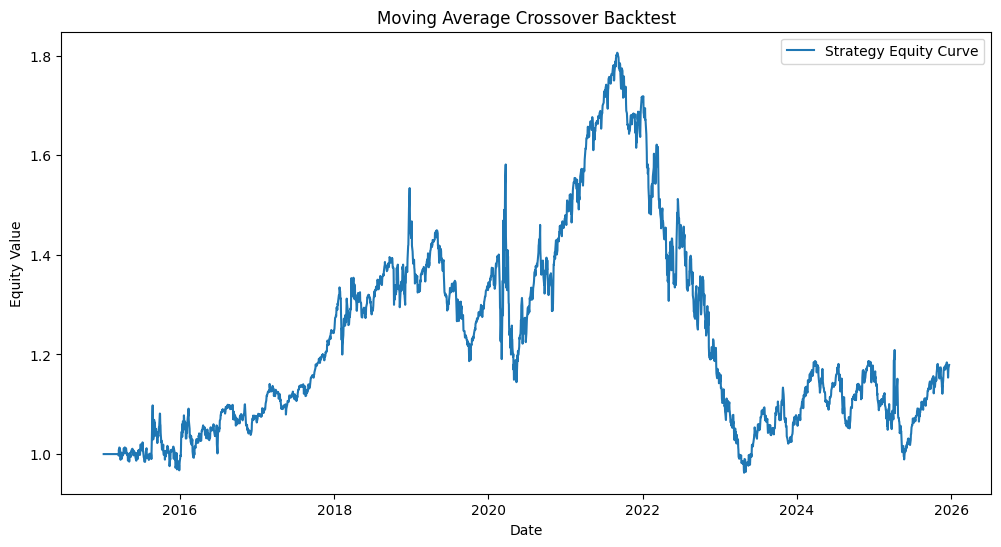

In [ ]:
import matplotlib.pyplot as plt

equity = (1 + results["strategy_returns"]).cumprod()

plt.figure(figsize=(12,6))
plt.plot(equity, label="Strategy Equity Curve")

plt.title("Moving Average Crossover Backtest")
plt.xlabel("Date")          # X‑axis label
plt.ylabel("Equity Value")  # Y‑axis label

plt.legend()
plt.show()
